# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import importlib
importlib.reload(projeto_pf)

%matplotlib inline

## Criação das partículas e do robô

In [2]:
particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

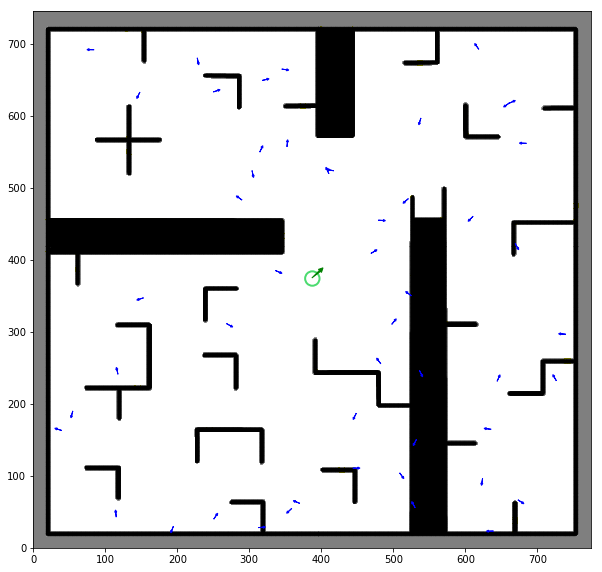

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[268.2366946865611, 311.44311846995953, -0.504206710183138],
 [520.9516404120219, 485.01132142130155, 3.8576156855395496],
 [644.0886857005347, 231.1979388916529, 1.1470270914343192],
 [250.51053560667444, 39.73426496815452, 0.9770559890640755],
 [303.7459772758232, 524.0496732117222, -1.3591494838528124],
 [227.6654762854106, 680.5260892741419, -1.3666979701752349],
 [448.6229539737593, 187.08892587134378, -2.030290018557595],
 [660.3600601115004, 617.2643522120494, 0.40993511368481217],
 [479.0843612364956, 455.0152896036262, -0.062179634496724034],
 [661.3318370159444, 617.9113832527224, 3.7475582525078],
 [684.9663382395713, 561.7666602135324, 3.109006820913377],
 [336.22779609644095, 385.1191738387797, -0.404132898785988],
 [344.99536137385564, 664.8831102625904, -0.14218445680636504],
 [314.4104726395832, 549.5098762913992, 1.123203748284944],
 [532.2151577887936, 150.77543612729397, -2.0470319746436703],
 [289.94641859198487, 482.9570479870916, 2.521441780788243],
 [117.5712634

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.80000000000000004,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [13]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [14]:
valores_novas_particulas

[[268.2366946865611, 311.44311846995953, -0.504206710183138],
 [268.2366946865611, 311.44311846995953, -0.504206710183138],
 [520.9516404120219, 485.01132142130155, 3.8576156855395496],
 [268.2366946865611, 311.44311846995953, -0.504206710183138],
 [227.6654762854106, 680.5260892741419, -1.3666979701752349],
 [448.6229539737593, 187.08892587134378, -2.030290018557595],
 [268.2366946865611, 311.44311846995953, -0.504206710183138],
 [268.2366946865611, 311.44311846995953, -0.504206710183138],
 [268.2366946865611, 311.44311846995953, -0.504206710183138],
 [268.2366946865611, 311.44311846995953, -0.504206710183138]]

![](animated.gif)